In [1]:
import boto3
import numpy as np 
import pandas as pd
import io
from collections import Counter

In [2]:
client = boto3.client('s3')
resource = boto3.resource('s3')

In [3]:
obj = client.get_object(Bucket = 'daanmatchdatafiles', Key = 'from Shekhar/Final_Data_ngoimpact.com.xlsx')
ngoimpact = pd.read_excel(io.BytesIO(obj['Body'].read()))
ngoimpact.head()

,Link,About,VISION,Your organisation is registered as,Permanent account number (PAN),Registration number / CIN & registration date,12A registration number & registration date,80G registration number & registration date,FCRA registration number & registration date,35AC registration number & registration date,...,Project description,Logo,Name,About Founder,Address,URL,Area of focus,Geographical Activity,Project Completed,Funding requirement
0,http://www.ngoimpact.com/ngos/turning-point-fo...,"TPF is a not for profit, national level volunt...",VisionThe vision of the organisation is to dev...,Charitable Society,AABTT1084A,S/41220 - 14-01-2002,1242 - 14-03-2003,8263043 - 11-10-2011,231660609 - 12-12-2005,NaN,...,Project description Drug De-addiction & Rehabi...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,Turning Point Foundation Best Non-Government O...,perm_identity Founded by Mr. Jojo Thomas ( 25 ...,"room A-528, Near Dayal Market, Narela Road, Al...",http://www.tpfindia.org,Healthcare / Prevention,Delhi,5.0,1500000.0
1,http://www.ngoimpact.com/ngos/basic-research-e...,Basic Research Education And Development Socie...,To inculcate the thirst for knowledge among st...,Charitable Society,AAATB4485E,1755 of 1989 - 11-08-1989,H.Qrs11/12A&80G/32/ - 19-10-1990,HYD/80G/155(3)/08-09 - 10-09-2008,010260111 - 05-08-2016,NaN,...,Project description BREAD Society seeks out sc...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,Basic Research Education And Development Socie...,perm_identity Founded by Mr. Ramamohan Rao Kak...,"room Plot # 1300 A, Jubilee Hills,, Road # 66,...",http://http://www.breadsocietyindia.org/,Education,Andhra Pradesh,18.0,3500000.0
2,http://www.ngoimpact.com/ngos/divya-jyothi-cha...,“ Divya Jyothi Charitable Trust” for the blind...,Empowering the visually impaired so that they ...,Public Charitable Trust,AABTD4733A,MYN-4-00326-2010-11 - 08-11-2010,D-54/12AA/MYS2011-12 - 27-06-2011,D-54/12AA/MYS2011-12 - 08-11-2010,094590221 - 22-12-2016,NaN,...,Project description “Divya Jyothi Charitable T...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,Divya Jyothi Charitable Trust Best Non-Governm...,perm_identity Founded by Shiv Prakash ( 07 yea...,"room No.151/f, Premises of Bapuji Children's H...",http://www.divyajyothitrust.org,Disability,Karnataka,18.0,1500000.0
3,http://www.ngoimpact.com/ngos/atma-foundation#...,ATMA Foundation is an NGO committed to empower...,"MissionEmpowering individuals, families & soci...",Public Charitable Trust,AADTA2673C,397/ IV / 06 - 08-05-2006,CIT-TCR/Tech/12A/18/ - 06-02-2012,AADTA 2673 C/09/15-1 - 28-05-2015,NaN,NaN,...,Project description The ATMA Harmony Centre cu...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,ATMA Foundation Best Non-Government Organizati...,perm_identity Founded by C.k Suresh ( 30 years...,"room ATMA Foundation, Surya Gardens,, Paliyam ...",http://www.atmafoundation.org,Promotion And Protection Of Child Rights,Kerala,0.0,0.0
4,http://www.ngoimpact.com/ngos/calcutta-rescue#...,Calcutta Rescue (CR) is a non – governmental o...,To reach out to more number of people living o...,Charitable Society,AAATC2014N,S/674950/ 1991- 92 - 04-04-1991,NaN,NaN,NaN,NaN,...,Project description Calcutta Rescue recognizes...,http://www.ngoimpact.com/ngoadmin/public/ngo_p...,Calcutta Rescue Best Non-Government Organizati...,perm_identity Founded by Jack Preger ( 35 year...,"room Calcutta Rescue 4th Floor, 85 Collin Stre...",http://www.calcuttarescue.org,Education,West Bengal,12.0,1500000.0


In [4]:
print("Shape:", ngoimpact.shape)
print("Rows:", ngoimpact.shape[0])
print("Columns:", ngoimpact.shape[1])
print("Each row is an NGO project.")

Shape: (551, 50)
Rows: 551
Columns: 50
Each row is an NGO project.


In [4]:
ngoimpact.columns

Index(['Link', 'About', 'VISION', 'Your organisation is registered as',
       'Permanent account number (PAN)',
       'Registration number / CIN & registration date',
       '12A registration number & registration date',
       '80G registration number & registration date',
       'FCRA registration number & registration date',
       '35AC registration number & registration date', 'Annual budget',
       'Total income', 'Total expenditure', 'Average monthly expenditure',
       'Total fixed assets', 'Long term loan', 'Total funding gap',
       'Number of full time employees', 'Number of part time employees',
       'Number of consultants', 'Number of volunteers / interns',
       'Which operational area do you require additional help with?',
       'Number of board members', 'Number of meetings done',
       'Governance photos', 'Governance documents',
       'Who are your major funders?', 'Name your funders',
       'Project start date', 'Project end/expected close date',
       '

In [5]:
dataset_columns = [column for column in ngoimpact.columns]

dataset_dtypes = [dtype for dtype in ngoimpact.dtypes]

data = {"Column Name": dataset_columns,  "Type": dataset_dtypes}
codebook = pd.DataFrame(data)
codebook

,Column Name,Type
0,Link,object
1,About,object
2,VISION,object
3,Your organisation is registered as,object
4,Permanent account number (PAN),object
5,Registration number / CIN & registration date,object
6,12A registration number & registration date,object
7,80G registration number & registration date,object
8,FCRA registration number & registration date,object
9,35AC registration number & registration date,object


**Missing Values in each Column**

In [32]:
ngoimpact.isnull().sum()

Link                                                             0
About                                                          177
VISION                                                         208
Your organisation is registered as                              39
Permanent account number (PAN)                                  39
Registration number / CIN & registration date                   39
12A registration number & registration date                    533
80G registration number & registration date                    534
FCRA registration number & registration date                   524
35AC registration number & registration date                   550
Annual budget                                                  106
Total income                                                   106
Total expenditure                                              106
Average monthly expenditure                                    106
Total fixed assets                                            

A lot of the columns have no values. 

Some organizations might have not had projects yet.
Project Photos: organizations might not have uploaded/taken photos

# URL

In [34]:
ngoimpact['URL'].head()

0                     http://www.tpfindia.org
1    http://http://www.breadsocietyindia.org/
2             http://www.divyajyothitrust.org
3               http://www.atmafoundation.org
4               http://www.calcuttarescue.org
Name: URL, dtype: object

In [36]:
url = ngoimpact['URL']
# Number of empty strings/missing values
print("Invalid:", sum(url == " ") + sum(url.isnull()))

print("No. of unique values:", len(url.unique()))

# Check for duplicates
counter = dict(Counter(url))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate URLs", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 289
No. of unique values: 262
No. of Duplicates: 2


,Duplicate URLs,Count
0,NaN,289
1,http://www.prayas-bharat.org,2


Some companies do not have websites.

**Link**

In [33]:
ngoimpact['Link'].head()

0    http://www.ngoimpact.com/ngos/turning-point-fo...
1    http://www.ngoimpact.com/ngos/basic-research-e...
2    http://www.ngoimpact.com/ngos/divya-jyothi-cha...
3    http://www.ngoimpact.com/ngos/atma-foundation#...
4    http://www.ngoimpact.com/ngos/calcutta-rescue#...
Name: Link, dtype: object

**Your organisation is registered as**

In [19]:
ngoimpact['Your organisation is registered as'].head()

0         Charitable Society
1         Charitable Society
2    Public Charitable Trust
3    Public Charitable Trust
4         Charitable Society
Name: Your organisation is registered as, dtype: object

In [20]:
ngoimpact['Your organisation is registered as'].value_counts()

Public Charitable Trust    356
Charitable Society         149
Section 8 Company            7
Name: Your organisation is registered as, dtype: int64

Organizations are registered as three different types: Public Charitable Trust, Charitable Society and Section 8 Company.

**Name**

In [37]:
ngoimpact['Name'].head()

0    Turning Point Foundation Best Non-Government O...
1    Basic Research Education And Development Socie...
2    Divya Jyothi Charitable Trust Best Non-Governm...
3    ATMA Foundation Best Non-Government Organizati...
4    Calcutta Rescue Best Non-Government Organizati...
Name: Name, dtype: object

In [38]:
column = ngoimpact['Name']


In [39]:
# Number of empty strings/missing values
print("Invalid:", sum(column == " ") + sum(column.isnull()))

print("No. of unique values:", len(column.unique()))

# Check for duplicates
counter = dict(Counter(column))
duplicates = { key:[value] for key, value in counter.items() if value > 1}
print("No. of Duplicates:", len(duplicates))

table = pd.DataFrame.from_dict(duplicates)
table = table.melt(var_name="Duplicate Names", value_name="Count").sort_values(by=["Count"], ascending=False).reset_index(drop=True)
table

Invalid: 0
No. of unique values: 539
No. of Duplicates: 1


,Duplicate Names,Count
0,404 | Best Non-Government Organizations & Soci...,13


**Area of Focus**

In [41]:
ngoimpact['Area of focus'].value_counts()

Livelihoods / Poverty Alleviation                                 133
Education                                                         115
Rural Development                                                  63
Women Empowerment                                                  30
Advocacy                                                           30
Promotion And Protection Of Child Rights                           28
Environment                                                        16
Community Development                                              16
Vocational And Skills Training                                      9
Healthcare / Prevention                                             7
Maternal And Child Health                                           4
Disability                                                          3
Youth Empowerment                                                   3
Disaster Management                                                 2
Elderly Care        

In [40]:
ngoimpact.columns

Index(['Link', 'About', 'VISION', 'Your organisation is registered as',
       'Permanent account number (PAN)',
       'Registration number / CIN & registration date',
       '12A registration number & registration date',
       '80G registration number & registration date',
       'FCRA registration number & registration date',
       '35AC registration number & registration date', 'Annual budget',
       'Total income', 'Total expenditure', 'Average monthly expenditure',
       'Total fixed assets', 'Long term loan', 'Total funding gap',
       'Number of full time employees', 'Number of part time employees',
       'Number of consultants', 'Number of volunteers / interns',
       'Which operational area do you require additional help with?',
       'Number of board members', 'Number of meetings done',
       'Governance photos', 'Governance documents',
       'Who are your major funders?', 'Name your funders',
       'Project start date', 'Project end/expected close date',
       '

**Location**

In [50]:
ngoimpact['Location'].value_counts()

Delhi                                                                                                      134
Maharashtra                                                                                                 48
West Bengal                                                                                                 35
Tamil Nadu                                                                                                  33
Odisha                                                                                                      21
Gujarat                                                                                                     17
Karnataka                                                                                                   15
Uttar Pradesh                                                                                               13
Bihar                                                                                                       12
H

Some have multiple locations

**Area/Town Name**

In [46]:
ngoimpact['Area/Town name'].value_counts()

N/A N/A                              12
N/A N/A N/A                           1
NEW DELHI                             1
Ukhurl                                1
New Delhi                             1
gg                                    1
N/A SATYABADI AND ASTARANGA BLOCK     1
Ghasera                               1
Name: Area/Town name, dtype: int64

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 25.0)

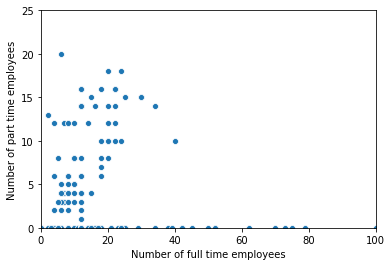

In [144]:
sns.scatterplot(ngoimpact['Number of full time employees'].str.replace(',','').fillna(0).astype(int), ngoimpact['Number of part time employees'].str.replace(',','').fillna(0).astype(int), data = ngoimpact, x_jitter = 1)
plt.xlim(0,100)
plt.ylim(0,25)

In [146]:
ngoimpact.columns

Index(['Link', 'About', 'VISION', 'Your organisation is registered as',
       'Permanent account number (PAN)',
       'Registration number / CIN & registration date',
       '12A registration number & registration date',
       '80G registration number & registration date',
       'FCRA registration number & registration date',
       '35AC registration number & registration date', 'Annual budget',
       'Total income', 'Total expenditure', 'Average monthly expenditure',
       'Total fixed assets', 'Long term loan', 'Total funding gap',
       'Number of full time employees', 'Number of part time employees',
       'Number of consultants', 'Number of volunteers / interns',
       'Which operational area do you require additional help with?',
       'Number of board members', 'Number of meetings done',
       'Governance photos', 'Governance documents',
       'Who are your major funders?', 'Name your funders',
       'Project start date', 'Project end/expected close date',
       '

**Annual Budget,Total Income, Total Expenditure, Average Monthly Expenditure**

We should remove the commas first and the currency sign, then convert to ints and change column name to include the currency we want it in.

In [161]:
ngoimpact['Annual budget']

0       ₹8,822,990
1       ₹2,500,000
2       ₹1,065,000
3      ₹27,310,000
4       ₹2,000,750
          ...     
546            NaN
547            NaN
548     ₹1,223,000
549     ₹1,223,000
550     ₹1,223,000
Name: Annual budget, Length: 551, dtype: object

In [158]:
ngoimpact['Total income']

0      ₹6,647,492
1      ₹3,706,438
2              ₹0
3              ₹0
4              ₹0
          ...    
546           NaN
547           NaN
548            ₹0
549            ₹0
550            ₹0
Name: Total income, Length: 551, dtype: object

In [159]:
ngoimpact['Total expenditure']

0      ₹6,995,030
1      ₹2,686,084
2              ₹0
3              ₹0
4              ₹0
          ...    
546           NaN
547           NaN
548            ₹0
549            ₹0
550            ₹0
Name: Total expenditure, Length: 551, dtype: object

In [160]:
ngoimpact['Average monthly expenditure']

0       ₹8,822,990
1       ₹2,500,000
2       ₹1,065,000
3      ₹27,310,000
4       ₹2,000,750
          ...     
546            NaN
547            NaN
548     ₹1,223,000
549     ₹1,223,000
550     ₹1,223,000
Name: Average monthly expenditure, Length: 551, dtype: object

**Which operational area do you require additional help with**


In [153]:
ngoimpact['Which operational area do you require additional help with?']

0      Marketing, Website Development, Fundraising
1        General Volunteering Of Time, Fundraising
2         Business Development, Finance, Marketing
3                                      Fundraising
4                                          Finance
                          ...                     
546                                            NaN
547                                            NaN
548                                        Finance
549                                        Finance
550                                        Finance
Name: Which operational area do you require additional help with?, Length: 551, dtype: object

**Number of board members**

This should be converted to integer

In [152]:
ngoimpact['Number of board members']

0       7.0
1      15.0
2       4.0
3       6.0
4       4.0
       ... 
546     NaN
547     NaN
548    12.0
549    12.0
550    12.0
Name: Number of board members, Length: 551, dtype: float64

In [150]:
ngoimpact['Number of board members'].fillna(0).astype(int)

0       7
1      15
2       4
3       6
4       4
       ..
546     0
547     0
548    12
549    12
550    12
Name: Number of board members, Length: 551, dtype: int32